In [75]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [76]:
training = pd.read_csv('data/train_selected.csv')
training.columns = ['ID', 'Cycle', 'S1','S2','S3','S4','ttf', 'label bnc']

In [77]:
dfx = training.drop(['ID', 'label bnc'], axis=1).values
dfy = training['ttf'].values

In [78]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(dfx)

In [79]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(dfx)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['Cycle', 'S1','S2', 'S3', 'S4', 'ttf'])

In [80]:
targetDataframe = training[['label bnc']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

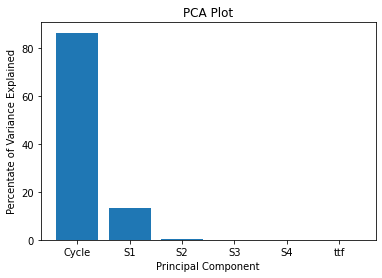

In [81]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['Cycle', 'S1', 'S2', 'S3', 'S4', 'ttf']
plt.bar(x= range(1,7), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()